Görüntü Boyutları (Row, Column, Channels): (400, 400, 3)
Görüntü Veri Tipi: uint8


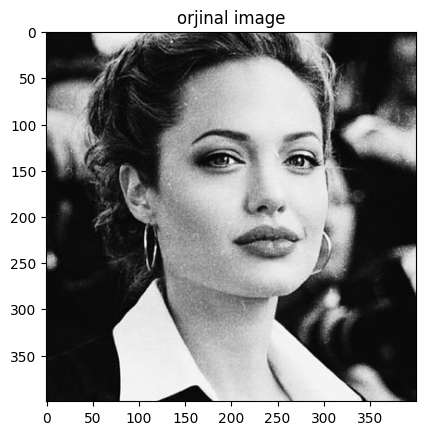

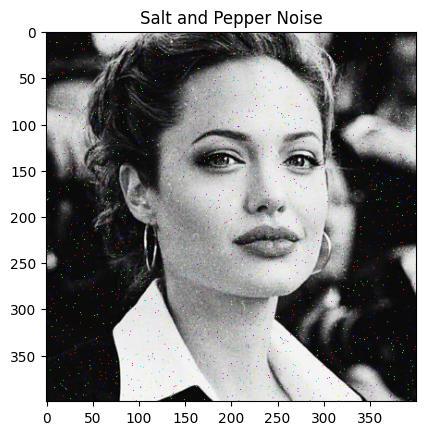

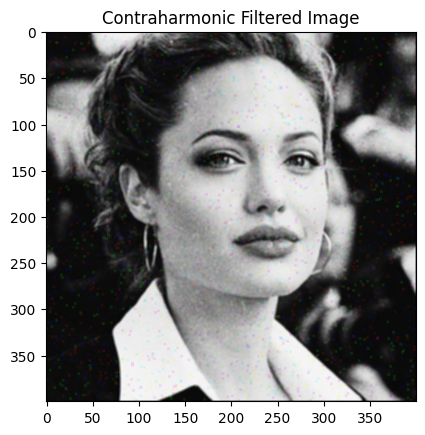

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def saltPepperNoise(image, s_vs_p=0.5, amount=0.01):
    row, col, ch = image.shape
    noisy = np.copy(image)

    # Tuz gürültüsü
    num_salt = np.ceil(amount * image.size * s_vs_p).astype(int)
    coords_salt = [np.random.randint(0, high=i, size=num_salt) for i in image.shape]
    noisy[tuple(coords_salt)] = 1

    # Biber gürültüsü
    num_pepper = np.ceil(amount * image.size * (1.0 - s_vs_p)).astype(int)
    coords_pepper = [np.random.randint(0, high=i, size=num_pepper) for i in image.shape]
    noisy[tuple(coords_pepper)] = 0

    return noisy

def contraharmonic_mean_filter(image, filter_size, Q):
    return cv2.filter2D(image, -1, np.ones((filter_size, filter_size), np.float32) / (filter_size ** 2), borderType=cv2.BORDER_CONSTANT)



# Örnek bir resim yükleyelim
img_url = '/content/drive/MyDrive/GoruntuIsleme/images/angelina.jpg'
img = cv2.imread(img_url)

# Görüntü özelliklerini görüntüle
print("Görüntü Boyutları (Row, Column, Channels):", img.shape)
print("Görüntü Veri Tipi:", img.dtype)

# Resmi normalleştir
img = img / 255.0

# Gürültü ekleyin
noise_img = saltPepperNoise(img)

# Kontraharmonik ortalama filtresi uygula
filter_size = 3  # Filtre boyutu belirlenir
Q = 1.5  # Kontraharmonik ortalama filtresinin parametresi
contraharmonic_filtered_img = contraharmonic_mean_filter(noise_img, filter_size, Q)


# Gürültü eklenmiş
# orjinal resmi göster
plt.imshow(img)
plt.title("orjinal image")
plt.show()
# Gürültü eklenmiş
plt.imshow(noise_img)
plt.title("Salt and Pepper Noise")
plt.show()
# kontraharmonik ortalama filtresi
plt.imshow(contraharmonic_filtered_img)
plt.title("Contraharmonic Filtered Image")
plt.show()


